sudo code:<br>
1) input <br>
2) selecting the channel in rgb <br>
3) histogram equalization <br>
4) thresholding <br>
5) Morphological closing operation <br>
6) Morphological opening operation <br>
7) Find the largest object of connect components<br>
8) determine the pupil size 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops   
from skimage.filters import threshold_otsu
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from skimage.segmentation import clear_border

In [ ]:
def getLargestCC(segmentation):
    labels = label(segmentation)
    assert( labels.max() != 0 ) 
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC


In [ ]:
img = cv2.imread("rnf1_3.jpg",  cv2.IMREAD_GRAYSCALE)
img2 = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

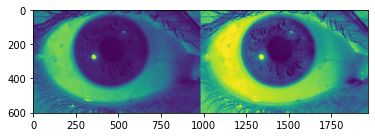

In [ ]:
equ = cv2.equalizeHist(img2)
res = np.hstack((img2,equ))
plt.imshow(res)

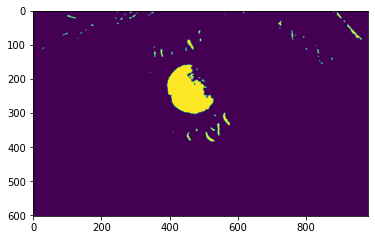

In [ ]:
#thresholding
ret,thresh1 = cv2.threshold(equ,7,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1)

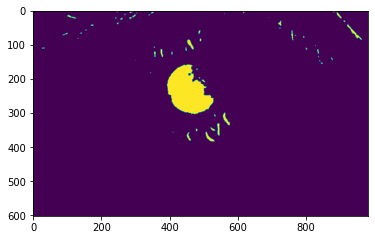

In [ ]:
#closing
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

<class 'numpy.ndarray'>


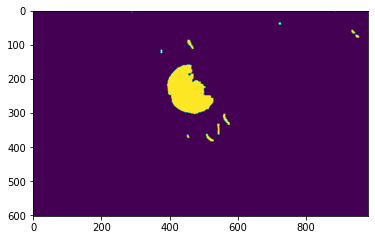

In [ ]:
#opening
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
print(type(opening))

<class 'numpy.ndarray'>


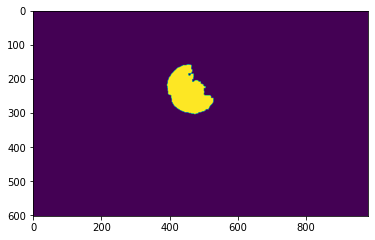

In [ ]:
large = getLargestCC(opening)
plt.imshow(large)
print(type(large))

0.4478087649402391 cm


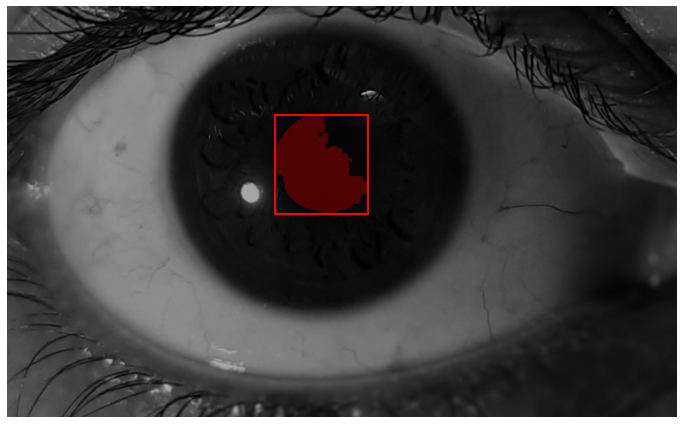

In [ ]:

label_image = label(large)

image_label_overlay = label2rgb(label_image, image=img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay, cmap=plt.cm.gray)

for region in regionprops(label_image):
    
    if region.area >= 100:
        
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        k = (maxc + maxr - minr - minc)/2
        print(0.0031872509960159364*k, "cm")

ax.set_axis_off()
plt.tight_layout()
plt.show()